In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
custom_colours = ['#74a09e','#98e2c6','#f2a553','#c14953']
sns.set_theme(style="whitegrid",palette=custom_colours)

In [3]:
raw_data = pd.read_csv("../paruvendu_api/outputs/clean_dataset.csv")
data = raw_data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15276 entries, 0 to 15275
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         15276 non-null  float64
 1   version          15276 non-null  object 
 2   price            15276 non-null  float64
 3   year             15276 non-null  int64  
 4   mileage          15276 non-null  float64
 5   fuel_type        15276 non-null  object 
 6   emission         15276 non-null  float64
 7   transmission     15276 non-null  object 
 8   door_nb          15276 non-null  float64
 9   technical_power  15276 non-null  float64
 10  seat_nb          15276 non-null  float64
 11  actual_power     15276 non-null  float64
 12  body_type        15276 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 1.5+ MB


In [5]:
data.head()

,location,version,price,year,mileage,fuel_type,emission,transmission,door_nb,technical_power,seat_nb,actual_power,body_type
0,86.0,dacia/duster,17600.0,2019,18300.0,essence,126.0,manuelle,4.0,7.0,5.0,130.0,4x4
1,59.0,mini/cooper,24990.0,2018,47500.0,essence,119.0,automatique,2.0,10.0,4.0,192.0,berline
2,53.0,nissan/qashqai,8490.0,2013,166400.0,diesel,129.0,manuelle,4.0,6.0,5.0,110.0,break
3,1.0,nissan/qashqai,16900.0,2016,61500.0,diesel,128.0,automatique,4.0,7.0,5.0,130.0,4x4
4,30.0,mini/cooper,17900.0,2018,58529.0,diesel,99.0,manuelle,4.0,5.0,5.0,95.0,berline


In [6]:
data.corr()

,location,price,year,mileage,emission,door_nb,technical_power,seat_nb,actual_power
location,1.000000,-0.019430,0.007298,0.012860,-0.031841,-0.000418,-0.003857,0.023636,-0.022262
price,-0.019430,1.000000,0.276656,-0.315221,0.494543,-0.025477,0.385382,-0.066603,0.661149
year,0.007298,0.276656,1.000000,-0.680324,-0.324273,0.265955,-0.073618,0.154158,-0.111931
mileage,0.012860,-0.315221,-0.680324,1.000000,0.146395,-0.096483,0.021126,0.018963,0.067220
emission,-0.031841,0.494543,-0.324273,0.146395,1.000000,-0.186182,0.380517,-0.171530,0.648016
door_nb,-0.000418,-0.025477,0.265955,-0.096483,-0.186182,1.000000,-0.073475,0.489731,-0.089457
technical_power,-0.003857,0.385382,-0.073618,0.021126,0.380517,-0.073475,1.000000,-0.094253,0.414703
seat_nb,0.023636,-0.066603,0.154158,0.018963,-0.171530,0.489731,-0.094253,1.000000,-0.138674
actual_power,-0.022262,0.661149,-0.111931,0.067220,0.648016,-0.089457,0.414703,-0.138674,1.000000


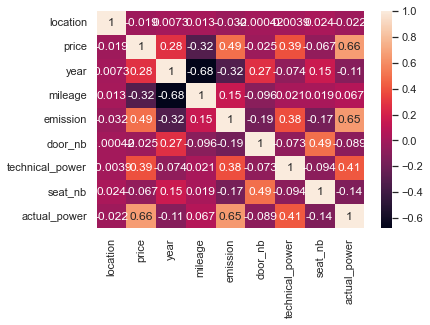

In [7]:
sns.heatmap(data.corr(), annot=True)
plt.show()

#### ============

#### ============

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [9]:
def encodage_feature(data, column):
    ohe = OneHotEncoder(sparse=False)
    feature_array = ohe.fit_transform(data[[column]])
    feature_labels = ohe.categories_
    feature_labels = np.array(feature_labels).ravel()
    features = pd.DataFrame(feature_array, columns=feature_labels)
    
    return features

In [10]:
def preprocessing(data):    
    for col in data.select_dtypes('object'):
        features = encodage_feature(data, col)
        data = pd.concat([data, features], axis=1)
        data = data.drop(columns=[col])
    
    X = data.drop('price', axis=1)
    y = data['price'].ravel()
    # y = y.values.reshape(y.shape[0], 1)

    print(X.shape, y.shape)
    
    return X, y

In [11]:
X, y = preprocessing(data)

(15276, 212) (15276,)


In [12]:
X.head(1)

,location,year,mileage,emission,door_nb,technical_power,seat_nb,actual_power,abarth/500,abarth/595,...,diesel,essence,automatique,manuelle,4x4,berline,break,cabriolet,coupé,monospace
0,86.0,2019,18300.0,126.0,4.0,7.0,5.0,130.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y

array([17600., 24990.,  8490., ...,  1400.,  5500.,  3500.])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=69)

In [16]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(10234, 212) (5042, 212)
(10234,) (5042,)


In [17]:
from sklearn import preprocessing

In [18]:
stds = preprocessing.StandardScaler()
X_std_train = stds.fit_transform(X_train)

In [19]:
X_std_train

array([[-1.61246879,  0.77407073, -1.01547776, ..., -0.15562575,
        -0.18167819, -0.21570414],
       [-1.68773552, -0.74867672, -0.33287353, ..., -0.15562575,
        -0.18167819, -0.21570414],
       [-1.68773552,  0.77407073, -0.97850431, ..., -0.15562575,
        -0.18167819, -0.21570414],
       ...,
       [ 1.21003373,  0.77407073, -0.76168879, ..., -0.15562575,
        -0.18167819, -0.21570414],
       [-1.68773552, -0.24109424, -0.08356883, ..., -0.15562575,
        -0.18167819, -0.21570414],
       [ 0.23156619, -0.49488548,  0.14718807, ..., -0.15562575,
         5.50423801, -0.21570414]])

#### ============

In [20]:
def R2_AdjR2(y,f,nb_features):
    p = nb_features
    n = len(y)
    SSres = 0
    for i in range(n):
        ei = y[i] - f[i]
        SSres += ei**2
    y_ = (1/n)*sum(y)
    SStot = 0
    for i in range(n):
        SStot += (y[i]-y_)**2
    R2 = 1 - (SSres/SStot)
    dfe = n-p-1
    dft = n-1
    adj_R2 = 1 - (SSres/dfe)/(SStot/dft) # adj_R2 = 1 - (1-R2)*(n-1)/(n-p-1)
    return R2, adj_R2

#### ============

In [21]:
LR = LinearRegression()

In [22]:
data['price'].mean()

23141.6569128044

In [23]:
LR.fit(X_train,y_train)
predictions = LR.predict(X_test)
Y = np.array(y_test)
f = np.array(predictions)
R2, adj_R2 = R2_AdjR2(Y,f,LR.n_features_in_)
print(f"R²:\n{R2}\n")
print(f"Adjusted R²:\n{adj_R2}\n")
print(f"Explained Variance Score:\n{explained_variance_score(y_test,predictions)}\n")
print(f"Coefficients:\n{LR.coef_}\n")
print(f"MAE:\n{mean_absolute_error(y_test, predictions)}\n")
print(f"MSE:\n{mean_squared_error(y_test, predictions)}\n")
print(f"RMSE:\n{mean_squared_error(y_test, predictions)**(1/2)}")

R²:
0.7738938428743265

Adjusted R²:
0.7639674595008241

Explained Variance Score:
0.7745000586725618

Coefficients:
[ 1.59727272e+00  1.13005023e+03 -5.98700510e-02  2.51248668e+01
 -4.48553718e+02  8.24677370e+01 -6.48969265e+01  3.47146906e+01
 -2.22390365e+09 -2.22390211e+09 -2.22389672e+09 -2.22389368e+09
 -2.22389201e+09 -2.22389008e+09 -2.22388680e+09 -2.22388451e+09
 -2.22389430e+09 -2.22388866e+09 -2.22388385e+09 -2.22384753e+09
 -2.22388695e+09 -2.22389196e+09 -2.22389531e+09 -2.22389300e+09
 -2.22389160e+09 -2.22388797e+09 -2.22389147e+09 -2.22389237e+09
 -2.22389047e+09 -2.22388600e+09 -2.22388016e+09 -2.22388346e+09
 -2.22386957e+09 -2.22388961e+09 -2.22389743e+09 -2.22389911e+09
 -2.22389671e+09 -2.22388682e+09 -2.22390350e+09 -2.22390102e+09
 -2.22390040e+09 -2.22390558e+09 -2.22390466e+09 -2.22390397e+09
 -2.22390139e+09 -2.22390504e+09 -2.22389934e+09 -2.22390240e+09
 -2.22389863e+09 -2.22390284e+09 -2.22390100e+09 -2.22389888e+09
 -2.22389797e+09 -2.22390323e+09 -2.22

In [24]:
lreg_std = LinearRegression()
lreg_std.fit(X_std_train, y_train)

LinearRegression()

In [25]:
print('Intercept: \n', lreg_std.intercept_)
print('Coefficients: \n', lreg_std.coef_)

Intercept: 
 22985.230083304254
Coefficients: 
 [ 4.24996559e+01  4.46676439e+03 -3.43115910e+03  8.49650460e+02
 -3.72104974e+02  8.54129831e+02 -4.90804523e+01  2.41042717e+03
  1.49130200e+15  8.21859687e+14  2.76076818e+15  2.35928669e+15
  2.78460495e+15  2.58748421e+15  1.77852240e+15  7.35165547e+14
  2.10560544e+15  2.41499210e+15  2.38730742e+15  1.16171657e+15
  1.19034697e+15  1.95764786e+15  3.19216095e+15  2.25838592e+15
  2.53570670e+15  2.15261070e+15  2.08969575e+15  2.87788661e+15
  2.65072817e+15  2.81996477e+15  1.64130604e+15  1.85229527e+15
  1.19034697e+15  1.42210974e+15  2.40119103e+15  1.59990417e+15
  1.19034697e+15  2.76076818e+15  1.07120703e+15  2.85486584e+15
  1.46860468e+15  1.39827554e+15  2.63820568e+15  2.94581591e+15
  2.66318930e+15  1.57878986e+15  1.77852240e+15  2.08969575e+15
  5.19942204e+14  2.40119103e+15  2.52258972e+15  3.12987459e+15
  1.10220900e+15  7.35165547e+14  2.92335724e+15  1.03927433e+15
  1.53567769e+15  1.07120703e+15  1.039274

#### ============

In [26]:
from sklearn.svm import LinearSVR

estimator_svr = LinearSVR(random_state=69)
selector_svr = RFE(estimator_svr)
selector_svr = selector_svr.fit(X, y)

print(f'SVR:')
print(f'{selector_svr.support_}')
print(f'{selector_svr.ranking_}\n')

estimator_tree= DecisionTreeRegressor()
selector_tree = RFE(estimator_tree)
selector_tree = selector_tree.fit(X, y)

print(f'Tree:')
print(f'{selector_tree.support_}')
print(f'{selector_tree.ranking_}')

c:\Users\thiba\Desktop\SIMPLON_PARUVENDU_API\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thiba\Desktop\SIMPLON_PARUVENDU_API\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thiba\Desktop\SIMPLON_PARUVENDU_API\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thiba\Desktop\SIMPLON_PARUVENDU_API\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thiba\Desktop\SIMPLON_PARUVENDU_API\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\thiba\

SVR:
[False False False False  True  True  True  True  True  True  True False
 False False False False  True False  True  True False False False  True
  True  True False  True  True  True  True False False  True False  True
 False  True False  True False  True  True  True  True  True False  True
 False  True  True  True False False  True False  True  True False False
 False False  True False  True False False  True False False  True  True
 False False  True False  True False False False False False False False
  True False  True False False  True False False  True False False False
  True  True  True False  True False False  True  True  True  True False
 False False  True False False False  True False  True False  True False
 False False  True False  True False  True  True False False False False
  True False False False  True  True  True  True False False  True  True
 False False False False False  True  True  True False  True False False
  True False False  True  True False  True  Tr